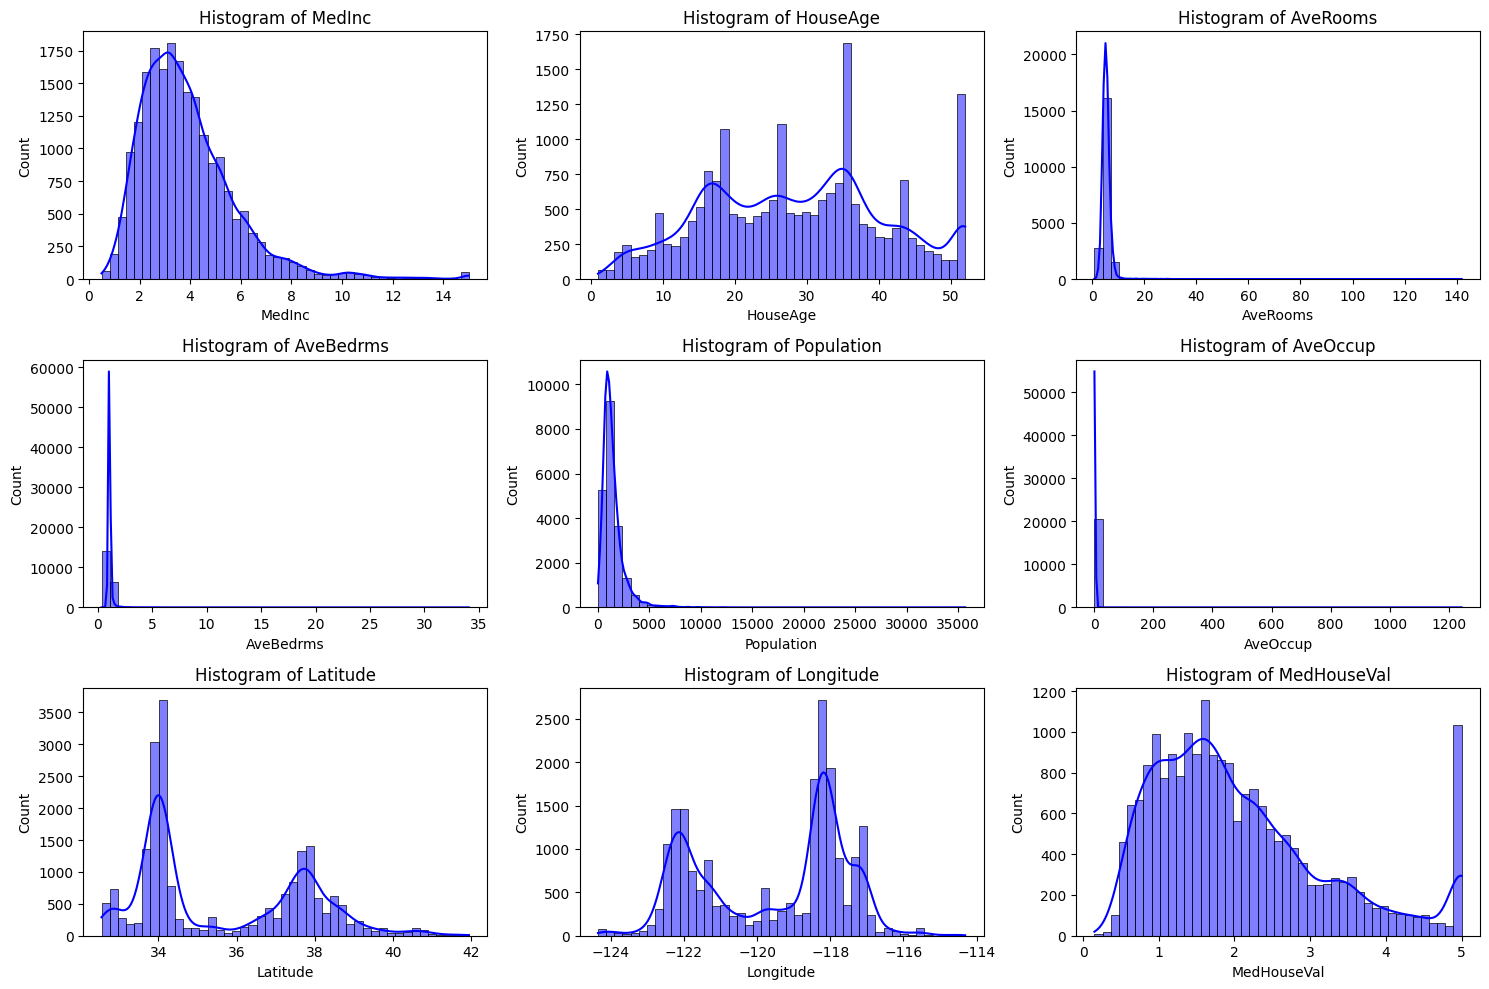

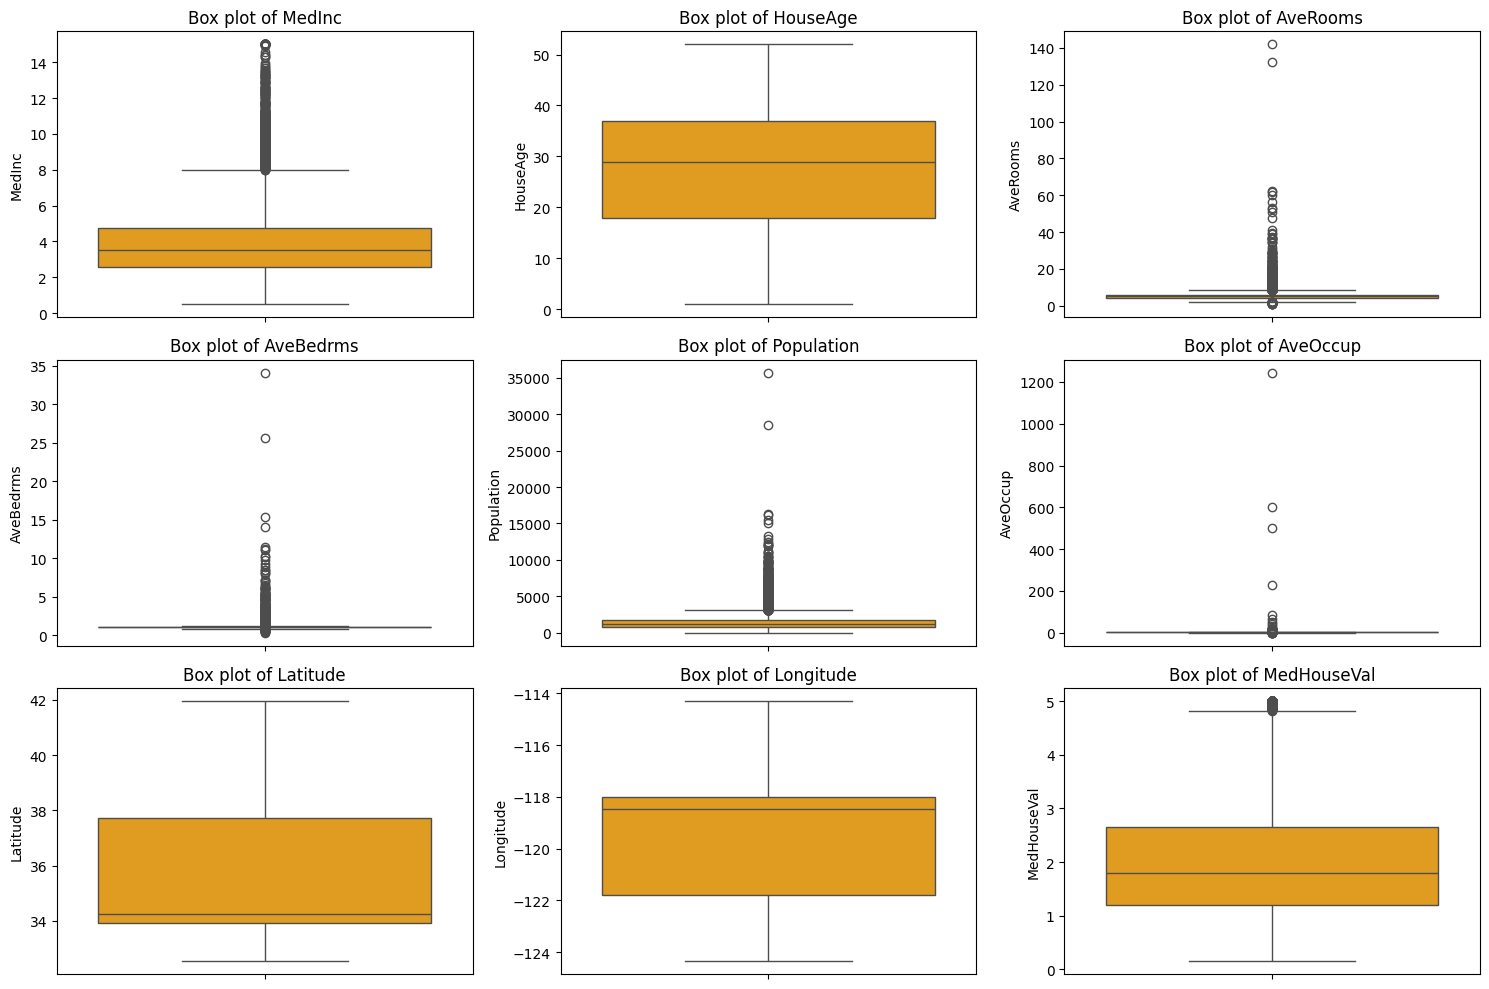

Description of outliers
{'MedInc': 681, 'HouseAge': 0, 'AveRooms': 511, 'AveBedrms': 1424, 'Population': 1196, 'AveOccup': 711, 'Latitude': 0, 'Longitude': 0, 'MedHouseVal': 1071}
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing(as_frame=True)
housing_df=data.frame
numerical_features=housing_df.select_dtypes(include=[np.number])
numerical_features.head()
plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_features.columns):
    plt.subplot(3,3,i+1)
    sns.histplot(data=housing_df[feature],kde=True,bins=45,color='blue')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_features.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=housing_df[feature],color='orange')
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()
print("Description of outliers")
outliers_summary={}
for feature in numerical_features.columns:
    Q1=housing_df[feature].quantile(0.25)
    Q3=housing_df[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=housing_df[(housing_df[feature]<lower_bound)|(housing_df[feature]>upper_bound)]
    outliers_summary[feature]=len(outliers)
print(outliers_summary)
print(housing_df.describe())